In [2]:
import Ngl, Nio
import os, numpy, csv
from IPython.display import Image

outfilename = "newcolor1"

#os.system('rm '+outfilename+'.png')

dirc = Ngl.pynglpath("data")
f    = Nio.open_file(os.path.join(dirc,"cdf","uv300.nc"))
u    = f.variables["U"][1,:,:]
lat  = f.variables["lat"][:]
lon  = f.variables["lon"][:]
 
wks_type = "png"
wks = Ngl.open_wks(wks_type, outfilename)

cnres                 = Ngl.Resources()
cnres.nglDraw  = False
cnres.nglFrame = False

# Contour resources
cnres.cnFillOn        = True
cnres.cnFillPalette   = "BlueYellowRed"      # New in PyNGL 1.5.0
cnres.cnLinesOn       = False
cnres.cnLineLabelsOn  = False
cnres.cnFillMode             = "RasterFill"

# Labelbar resource
cnres.lbOrientation   = "horizontal"
cnres.lbBoxEndCapStyle= "TriangleBothEnds"

# Scalar field resources
cnres.sfXArray        = lon
cnres.sfYArray        = lat

# Map resources
cnres.mpFillOn               = True
#cnres.mpPerimOn = False
#cnres.mpFillOn               = False
#cnres.mpFillDrawOrder        = "PostDraw"
cnres.mpFillDrawOrder        = "PostDraw"
#cnres.mpLandFillColor        = "Gray"
#cnres.mpOceanFillColor       = "Transparent"
cnres.mpLandFillColor        = "Transparent"
cnres.mpOceanFillColor       = "Gray"
cnres.mpInlandWaterFillColor = "Transparent"
cnres.mpGridAndLimbOn      =  False                  #-- don't draw grid lines
cnres.mpProjection = "Robinson"
cnres.mpCenterLonF = 0.
#cnres.mpLimitMode               = "LatLon"
# Remove box around plot
cnres.pmTickMarkDisplayMode = "Never"
cnres.lbLabelBarOn = False

# Remove Lon/lat ticks
cnres.tmXBOn = False
cnres.tmYLOn = False
cnres.tmXTOn = False
cnres.tmYROn = False
#cnres.gsnPanelBottom = 0.2
#cnres.gsnPanelYWhiteSpacePercent = 20

# Titles
cnres.tiMainString = 'Test'
#cnres.tiMainFont        = "Helvetica-bold"
#cnres.tiMainOffsetYF    = 0.025
#cnres.tiMainFontHeightF = 0.015



cnres2                 = Ngl.Resources()
cnres2.nglDraw  = False
cnres2.nglFrame = False

# Scalar field resources
cnres2.sfXArray        = lon
cnres2.sfYArray        = lat

# Map resources
cnres2.mpGridAndLimbOn      =  False                  #-- don't draw grid lines
cnres2.mpProjection = "Robinson"
cnres2.mpCenterLonF = 0.
cnres2.tiMainString = 'Test'

# Remove box around plot
cnres2.pmTickMarkDisplayMode = "Never"

# Remove Lon/lat ticks
cnres2.tmXBOn = False
cnres2.tmYLOn = False
cnres2.tmXTOn = False
cnres2.tmYROn = False

contour = Ngl.contour_map(wks,u,cnres)
contour2 = Ngl.map(wks,cnres2)

gsres                   = Ngl.Resources()
# Polyline resources.
gsres.gsLineColor       = "Blue"
gsres.gsLineThicknessF  = 3.0      # thrice thickness


regions_filename='/home/jservon/Chapter12_IPCC/scripts/ATLAS/reference-regions/IPCC-WGI-reference-regions-v4_coordinates.csv'

# -- Store the informations by region in the 'regions' dictionary
regions = dict()
with open(regions_filename) as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')#, quotechar='|')
    for row in spamreader:
        #print(', '.join(row))
        #if row[1]=='Land':
        region_dict = dict(region = row[0],
                           domain = row[1],
                           long_name = row[2],
                          )
        lats_vect = []
        lons_vect = []
        for vertice in row[4:-1]:
            if vertice:
                dum = vertice.split('|')
                lons_vect.append(float(dum[0]))
                lats_vect.append(float(dum[1]))
        region_dict['lons_vect'] = lons_vect+[lons_vect[0]]
        region_dict['lats_vect'] = lats_vect+[lats_vect[0]]
        #
        regions[row[3]] = region_dict


for subregion in regions:
    if regions[subregion]['region']=='AFRICA':
        lons_vect = regions[subregion]['lons_vect']
        lats_vect = regions[subregion]['lats_vect']
        poly1 = Ngl.add_polyline(wks,contour2,lons_vect,lats_vect,gsres)
#poly1 = Ngl.add_polyline(wks,contour2,[-80,-80,40,40,-80],[20,80,80,20,20],gsres)

Ngl.overlay(contour, contour2)

Ngl.draw(contour)
Ngl.draw(contour2)
Ngl.frame(wks)


Ngl.end()

In [3]:
!ls -ltr

total 38772
-rw-r--r-- 1 jservon ciclad     2676 21 déc.  09:31 Browse_CMIP6_data.ipynb
-rw-r--r-- 1 jservon ciclad     1021  4 janv. 15:53 multipanelfigure_test.R
-rw-r--r-- 1 jservon ciclad  4031699  5 janv. 09:43 Figure_1_multipanel.ipynb
-rw-r--r-- 1 jservon ciclad   202499  7 janv. 14:17 pyNGL_firsttest.ipynb
-rw-r--r-- 1 jservon ciclad      219  7 janv. 18:07 climaf.log
-rw-r--r-- 1 jservon ciclad      878  7 janv. 18:08 last.out
-rw-r--r-- 1 jservon ciclad   371834  8 janv. 00:20 plot_ipcc_climaf.ipynb
-rw-r--r-- 1 jservon ciclad    84485  9 janv. 13:30 satellite2.png
-rw-r--r-- 1 jservon ciclad    80831  9 janv. 14:43 Rplot001.png
-rw-r--r-- 1 jservon ciclad    39759  9 janv. 15:20 satellite_coastal.png
-rw-r--r-- 1 jservon ciclad   127721 11 janv. 21:48 satellite.png
-rw-r--r-- 1 jservon ciclad   432158 11 janv. 22:34 Quantile_plot_region.ipynb
-rw-r--r-- 1 jservon ciclad    91381 13 janv. 18:40 Reference_Regions_R.ipynb
-rw-r--r-- 1 jservon ciclad    12614 14 janv. 23:25 Aver

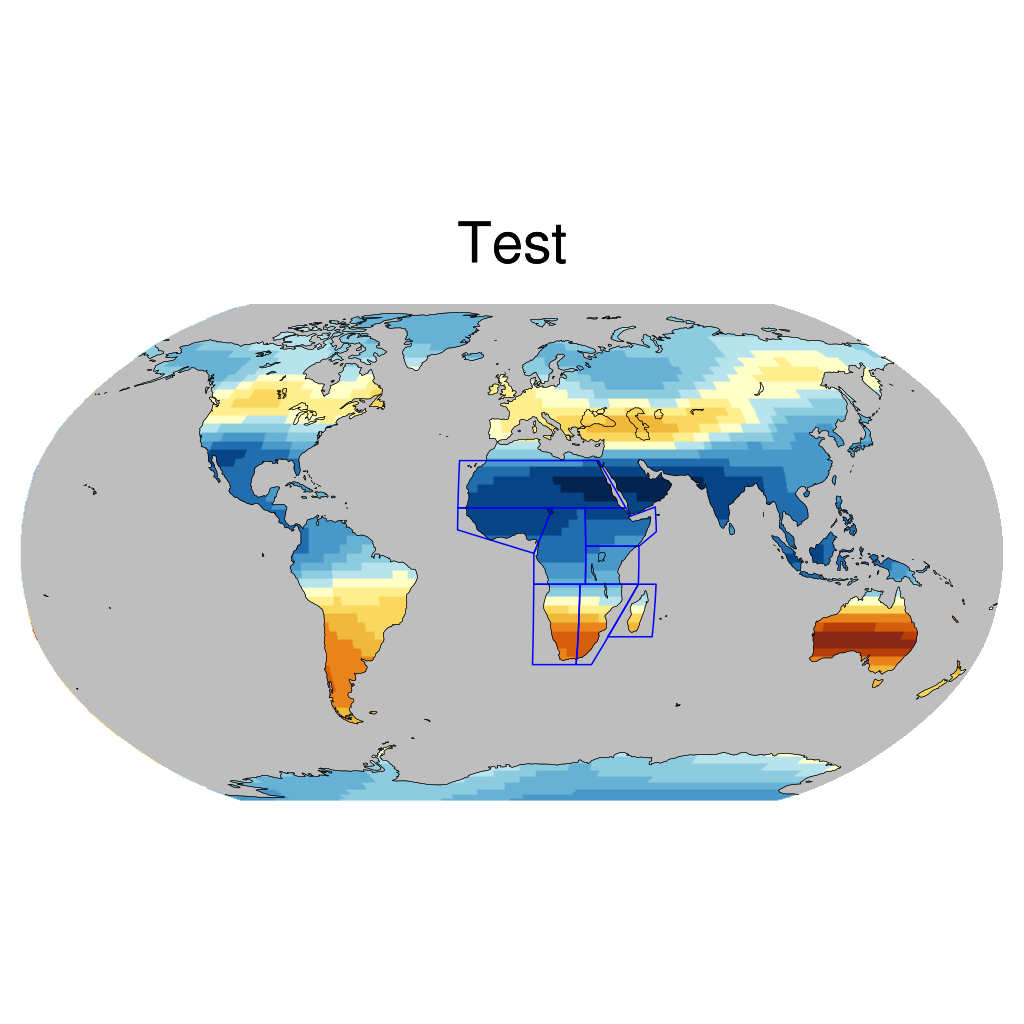

In [4]:
#from IPython.display import Image

#outfilename = "newcolor1"
#Image(outfilename+".000003.png")
Image(outfilename+".png")